1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

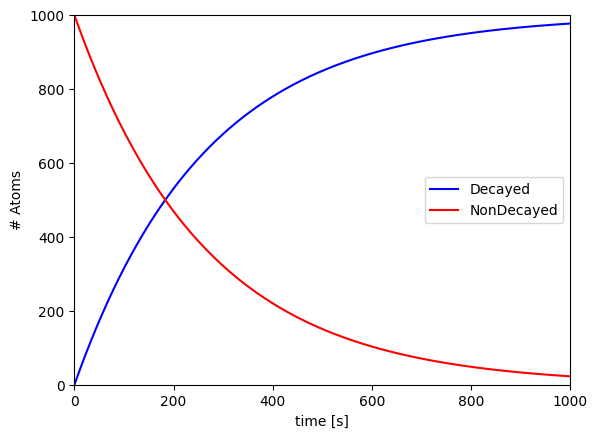

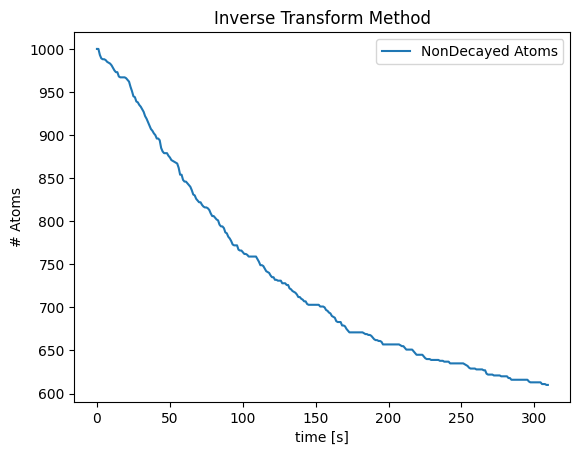

In [37]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

N = 1000
tau = 3.052*60


def decay(x):
    return (1-2**(-x/tau))


x=np.linspace(0, 1000, 1000)
#plot the graphs
plt.plot(x, N*decay(x), color='b', label='Decayed')
plt.plot(x, N*(1-decay(x)),color='r',label='NonDecayed')
plt.xlabel('time [s]')
plt.ylabel('# Atoms')
plt.axis([0, 1000, 0, 1000])
plt.legend()
plt.show()


# Definition of the inverse cumulative distribution function.
def inverse_cum(z,tau):
    t = np.zeros(len(z))
    for i in range(len(z)):
        t[i] = -tau*math.log((1-z[i]),2)
    return t

u = np.random.random(1000)
v = np.sort(inverse_cum(u, tau)) # apply the inverse of the CDF

time = np.linspace(0,1000,1000)  # time 
counts = np.zeros(1000)              
index = 0

for j in range(1000):
    if v[j] < time[index]:
        counts[index] += 1
    else:
        index += 1

total = np.sum(counts)
q = 0
decayed_T = []
while(np.sum(counts[:q])<total):
    decayed_T.append(np.sum(counts[:q]))
    q += 1

decayed = np.asarray(decayed_T) 
not_decayed = (1000-decayed)           

plt.plot(time[:q],not_decayed,  label='NonDecayed Atoms')
plt.xlabel('time [s]')
plt.ylabel('# Atoms')
plt.title('Inverse Transform Method')
plt.legend()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Hit/Mess Method:
Integral : 1.346731
Error : 0.0006831551434337607 

Mean Value Method:
Integral : 1.3468058104649914
Error : 0.0005588446213222167 

Difference:  7.481046499147048e-05 



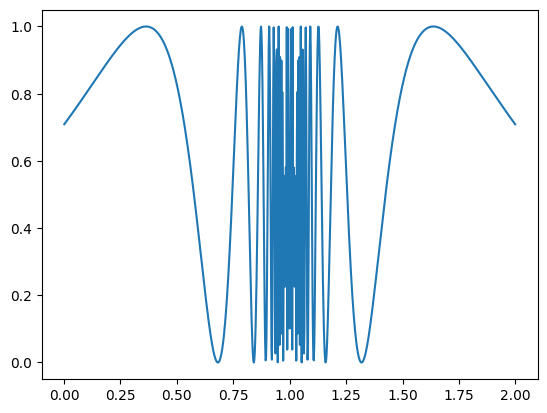

In [38]:
def f(x):
    return np.square(np.sin(1/(1-x)))

x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x))


N = 100000
r1 = []
for i in range(20):
    count = 0
    for i in range(N):
        x = 2 * np.random.random()
        y = np.random.random()     
        if y < f(x): 
            r.append(count)
            count += 1
    r1.append(2 * count / N)


print("Hit/Mess Method:")
print("Integral :", np.mean(r1))
print("Error :", np.std(r1) / np.sqrt(20),"\n")


r2 = []
for i in range(20):
    x = 2 * np.random.random(N)
    r2.append(2 * np.sum(f(x)) / N)

print("Mean Value Method:")
print("Integral :", np.mean(r2))
print("Error :", np.std(r2) / np.sqrt(20),"\n")

print("Difference: ", (np.mean(r2) - np.mean(r1)),"\n")

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [40]:
def f(x):
    y = np.sum(np.square(x))
    if y <= 1:
        return 1
    return 0

n = 10000
d2 = 2
x2 = np.random.uniform(-1.0, 1.0, size = (n, d2))
f2 = [f(x2[i]) for i in range(n)]
I2 = (2.0**d2)*np.mean(f2)

d10 = 10
x10 = np.random.uniform(-1.0, 1.0, size = (n, d10))
f10 = [f(x10[i]) for i in range(n)]
I10 = (2.0**d10)*np.mean(f10)

print("Integral 2D: ", I2)
print("Integral 10D: ", I10,"\n")

Integral 2D:  3.1476
Integral 10D:  2.9696 



4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [41]:

def f(x):
    return ((x**(-1/2))/(np.exp(x)+1))

def w(x):
    return (1/np.sqrt(x))

start = 0
end = 1
n = 10000

# generate a distribution of random points according to the weight function
y = np.random.random(n)

# calculate the normalization factor given by the integral of the weight function over the integration domain (in this case, it's 1)
w_int = np.sum(w(y))/n

# compute the integral with the importance sampling method
x = np.random.uniform(start, end, n)**2
h_is = 1.0 / n * np.sum(f(x) / w(x)) * w_int

# estimate and relative error
print("IS integral:", h_is)

IS integral: 0.8306783605460717
